In [ ]:
!pip install opendatasets
import opendatasets as od
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Kaggle Gamification in Education .csv

In [ ]:
from google.colab import files
files.upload()

Saving Students_gamification.csv to Students_gamification (1).csv


{'Students_gamification (1).csv': b'\xef\xbb\xbfStudent_ID,Practice_Exam,Final_Exam,User,Avg_Grade_Q1,Avg_Grade_Q2,Avg_Grade_Q3,Avg_Grade_Q4,Avg_Grade_Q5,Avg_Grade_Q6,No_access_Q1,No_access_Q2,No_access_Q3,No_access_Q4,No_access_Q5,No_access_Q6\r\n1046,9.33,7.98,1,6,10,10,10,0,8,1,1,1,1,0,1\r\n1048,2.89,6.49,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n1050,7.67,6.9,1,9,10,10,10,10,10,1,1,1,1,1,1\r\n1052,4.97,7.69,1,6,9,5,4,9,4,2,2,2,1,1,2\r\n1054,3.89,7.78,1,9.33,10,10,10,10,10,12,1,1,1,1,1\r\n1056,4.75,6.02,1,7.67,8,9,10,6,6,3,2,2,2,2,2\r\n1058,,6.02,1,8,5,6.5,8,3,7,2,2,2,2,1,2\r\n1060,,3.98,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n1062,,3.96,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n1064,5.57,7.64,1,8.5,8,8,10,10,9.5,2,1,2,4,2,2\r\n1066,3.65,6.3,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n1070,8.43,6.25,1,3,10,6,6.5,4,5,2,1,1,2,1,1\r\n1078,5,6.53,1,8.33,10,8,10,8,7.5,6,1,1,1,1,2\r\n1080,4.28,5.28,1,9.5,10,3,7,0,4,2,1,2,2,0,1\r\n1082,6.78,7.59,1,6,4,2,2,6,3,1,1,1,1,1,1\r\n1084,8.61,7.94,0,0,0,0,0,0,0,0,0,0,0,0,0\r\n1088,7.5,5.79,1,5.33,7,

In [ ]:
df = pd.read_csv('Students_gamification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     69 non-null     int64  
 1   Practice_Exam  57 non-null     float64
 2   Final_Exam     69 non-null     float64
 3   User           69 non-null     int64  
 4   Avg_Grade_Q1   69 non-null     float64
 5   Avg_Grade_Q2   69 non-null     float64
 6   Avg_Grade_Q3   69 non-null     float64
 7   Avg_Grade_Q4   69 non-null     float64
 8   Avg_Grade_Q5   69 non-null     float64
 9   Avg_Grade_Q6   69 non-null     float64
 10  No_access_Q1   69 non-null     int64  
 11  No_access_Q2   69 non-null     int64  
 12  No_access_Q3   69 non-null     int64  
 13  No_access_Q4   69 non-null     int64  
 14  No_access_Q5   69 non-null     int64  
 15  No_access_Q6   69 non-null     int64  
dtypes: float64(8), int64(8)
memory usage: 8.8 KB


#Cleaning data

In [ ]:
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Student_ID        0
Practice_Exam    12
Final_Exam        0
User              0
Avg_Grade_Q1      0
Avg_Grade_Q2      0
Avg_Grade_Q3      0
Avg_Grade_Q4      0
Avg_Grade_Q5      0
Avg_Grade_Q6      0
No_access_Q1      0
No_access_Q2      0
No_access_Q3      0
No_access_Q4      0
No_access_Q5      0
No_access_Q6      0
dtype: int64


#drop practice exam nulls

In [ ]:
df.fillna('Practice_Exam', inplace = True)
print(df.isnull().sum())

Student_ID       0
Practice_Exam    0
Final_Exam       0
User             0
Avg_Grade_Q1     0
Avg_Grade_Q2     0
Avg_Grade_Q3     0
Avg_Grade_Q4     0
Avg_Grade_Q5     0
Avg_Grade_Q6     0
No_access_Q1     0
No_access_Q2     0
No_access_Q3     0
No_access_Q4     0
No_access_Q5     0
No_access_Q6     0
dtype: int64


In [ ]:
print("0s")
print("==")
print(df.eq(0).sum())


0s
==
Student_ID        0
Practice_Exam     2
Final_Exam        0
User             25
Avg_Grade_Q1     27
Avg_Grade_Q2     26
Avg_Grade_Q3     27
Avg_Grade_Q4     28
Avg_Grade_Q5     30
Avg_Grade_Q6     29
No_access_Q1     27
No_access_Q2     26
No_access_Q3     27
No_access_Q4     28
No_access_Q5     30
No_access_Q6     29
dtype: int64


#Print correlating features

In [ ]:
corr = df.corr()
print(corr)

              Student_ID  Final_Exam      User  Avg_Grade_Q1  Avg_Grade_Q2  \
Student_ID      1.000000    0.004429 -0.056476     -0.129650     -0.098056   
Final_Exam      0.004429    1.000000  0.363367      0.345724      0.339948   
User           -0.056476    0.363367  1.000000      0.860533      0.896904   
Avg_Grade_Q1   -0.129650    0.345724  0.860533      1.000000      0.847672   
Avg_Grade_Q2   -0.098056    0.339948  0.896904      0.847672      1.000000   
Avg_Grade_Q3   -0.172488    0.277185  0.770665      0.770043      0.847909   
Avg_Grade_Q4   -0.079139    0.350147  0.776694      0.737271      0.850443   
Avg_Grade_Q5   -0.078061    0.325119  0.745581      0.708237      0.802734   
Avg_Grade_Q6   -0.140574    0.347819  0.747850      0.707260      0.799182   
No_access_Q1   -0.191414    0.224525  0.573874      0.643258      0.623599   
No_access_Q2    0.015275    0.323666  0.732401      0.701960      0.712157   
No_access_Q3   -0.022971    0.317235  0.701601      0.735081    

<ipython-input-14-add040053286>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


#Show correlationb matrix

<ipython-input-15-d094b1aa616a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


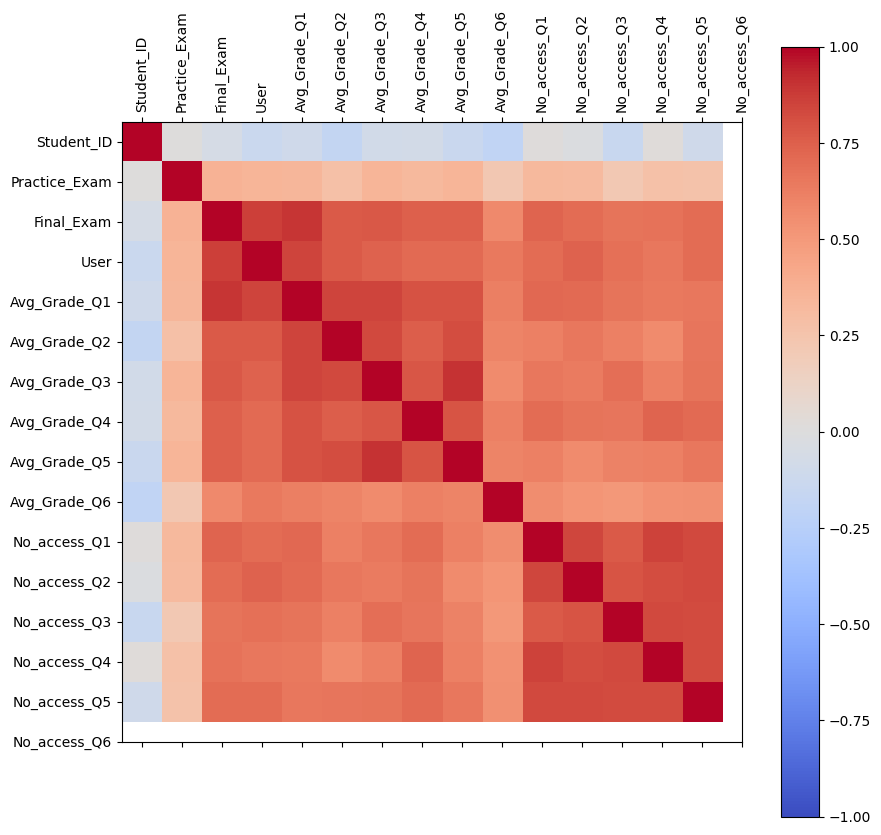

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)





#Show heatmap

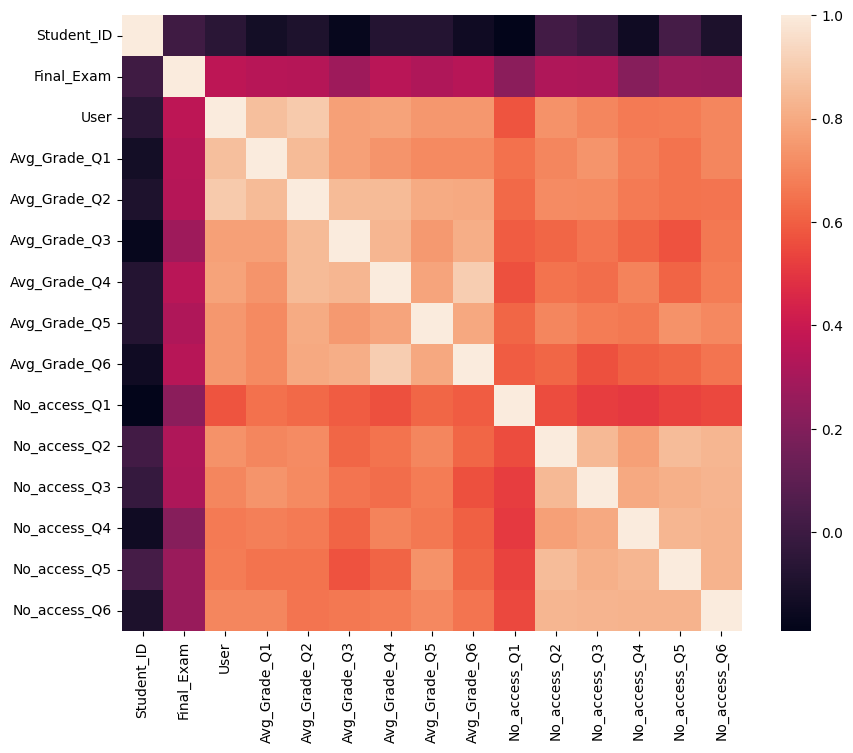

In [ ]:
sns.heatmap(df.corr(numeric_only = True))
fig = plt.gcf()
fig.set_size_inches(10,8)

#Highest correlating features in regards to 'User':


In [ ]:

print(df.corr(numeric_only = True).nlargest(4,'User').index)
print(df.corr().nlargest(4, 'User').values[:,14])



Index(['User', 'Avg_Grade_Q2', 'Avg_Grade_Q1', 'Avg_Grade_Q4'], dtype='object')
[0.70099964 0.65235988 0.69789817 0.67127942]


<ipython-input-17-5d5e9ff7b6ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().nlargest(4, 'User').values[:,14])


#Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))


StandardScaler()


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

#Try Logistic Regression Model

In [ ]:
X = df[['Avg_Grade_Q2', 'Avg_Grade_Q1', 'Avg_Grade_Q4']]
y = df.iloc[:,14]
log_regress = linear_model.LogisticRegression()



In [ ]:
log_regress_score = cross_val_score(log_regress, X, y, cv=11,
scoring='accuracy').mean()
print(log_regress_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

0.6861471861471862


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
result = []
result.append(log_regress_score)

#Try KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
cv_scores = []
folds = 10
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))

#Begin cross-validation

In [ ]:
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
knn_score = max(cv_scores)
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

The optimal number of neighbors is 11
0.7404761904761905


#Try SVM

In [ ]:
from sklearn import svm

#linear kernel

In [ ]:
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                   cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.6976190476190476


#rbf kernel

In [ ]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.726190476190476


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


#Assess accuracy of algorithmic models

In [ ]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.740476
SVM RBF Kernel,0.726190
SVM Linear Kernel,0.697619
Logistic Regression,0.686147


#Fit KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
import pickle

In [ ]:
filename = 'gamification.sav'
pickle.dump(knn, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

#Make predictions

In [ ]:
Avg_Grade_Q2=3
Avg_Grade_Q1=2
Avg_Grade_Q4=6

In [ ]:
prediction = loaded_model.predict([[Avg_Grade_Q2, Avg_Grade_Q1, Avg_Grade_Q4]])
print(prediction)
if (prediction[0]==0):
  print("Not a Player")
else:
  print("Player")

[1]
Player


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
proba = loaded_model.predict_proba([[Avg_Grade_Q2, Avg_Grade_Q1, Avg_Grade_Q4]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.21052632 0.57894737 0.15789474 0.05263158 0.        ]]
Confidence: 57.89%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
